In [24]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import layers
from keras.layers import Dense

# Tensorflow Model to train a conversion from kilometers to miles

In [13]:
#List for both kilometers and miles
kms_a = np.array([10, 15, 20, 23, 29, 30, 35, 39, 40], dtype=float)
miles_b = np.array([6.2, 9.3, 12.4, 14.3, 18.0, 18.6, 21.7, 24.4, 24.9], dtype=float)

In [14]:
#Iterating through the list and printing out the corresponding values

In [15]:
for i, c in enumerate(kms_a):
    print ("{} Kilometers = {} Miles".format(c, miles_b[i]))

10.0 Kilometers = 6.2 Miles
15.0 Kilometers = 9.3 Miles
20.0 Kilometers = 12.4 Miles
23.0 Kilometers = 14.3 Miles
29.0 Kilometers = 18.0 Miles
30.0 Kilometers = 18.6 Miles
35.0 Kilometers = 21.7 Miles
39.0 Kilometers = 24.4 Miles
40.0 Kilometers = 24.9 Miles


# Dense Network with a single layer and a single Neuron

In [19]:
D1 = tf.keras.layers.Dense(units=1, input_shape=[1])
tf.keras.Sequential([D1])

In [28]:
model= tf.keras.Sequential([D1])

In [30]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [31]:
history = model.fit(kms_a, miles_b, epochs=500, verbose=False)
print('The Model has Finished Training')

The Model has Finished Training


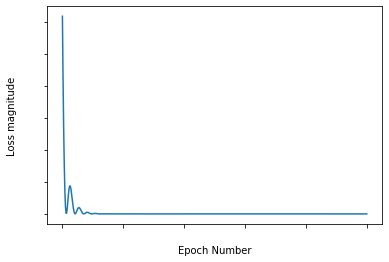

In [34]:
plt.xlabel('Epoch Number', color='black')
plt.ylabel("Loss magnitude", color='black')
plt.plot(history.history['loss'])
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

# Now we have a trained model. Use it to predict the value of a distance not in the data

In [35]:
print(model.predict([67]))

[[41.72275]]


In [38]:
#creating a simple method that takes a list of kilometers and then we use our model to predict the values in miles

def test_model(model):
    MSE = []
    xx, yy = [], []
    for x in range (10, 110, 10):
        y_hat = model.predict([x]).astype(float)
        y_hat = y_hat[0]
        y = x * 0.62
        error_squ = (y_hat - y)**2
        MSE.append(error_squ)
        print('{} Kilometers equals {} Miles, Model Predicted {} Miles, Diff_squared is {}'.format(x, y, y_hat, error_squ))
    MSE = sum(MSE) / len(MSE)
    print('Total MSE is {}'.format(MSE))
print(test_model(model))
        

10 Kilometers equals 6.2 Miles, Model Predicted [6.18860102] Miles, Diff_squared is [0.00012994]
20 Kilometers equals 12.4 Miles, Model Predicted [12.42266273] Miles, Diff_squared is [0.0005136]
30 Kilometers equals 18.6 Miles, Model Predicted [18.65672302] Miles, Diff_squared is [0.0032175]
40 Kilometers equals 24.8 Miles, Model Predicted [24.89078522] Miles, Diff_squared is [0.00824196]
50 Kilometers equals 31.0 Miles, Model Predicted [31.1248455] Miles, Diff_squared is [0.0155864]
60 Kilometers equals 37.2 Miles, Model Predicted [37.35890579] Miles, Diff_squared is [0.02525105]
70 Kilometers equals 43.4 Miles, Model Predicted [43.59296799] Miles, Diff_squared is [0.03723664]
80 Kilometers equals 49.6 Miles, Model Predicted [49.82703018] Miles, Diff_squared is [0.0515427]
90 Kilometers equals 55.8 Miles, Model Predicted [56.06108856] Miles, Diff_squared is [0.06816724]
100 Kilometers equals 62.0 Miles, Model Predicted [62.29515076] Miles, Diff_squared is [0.08711397]
Total MSE is [0.

# Lets have a look at the internal variables (layer weights) of the Dense layer

In [39]:
print('These are the layer variables: {}'.format(D1.get_weights()))

These are the layer variables: [array([[0.6234061]], dtype=float32), array([-0.04546018], dtype=float32)]


# Let's see what happens if we add more layers and a little more complexity

In [41]:
D1 = tf.keras.layers.Dense(units = 4, input_shape=[1])
D2 = tf.keras.layers.Dense(units = 4)
D3 = tf.keras.layers.Dense(units = 1)
model = tf.keras.Sequential([D1, D2, D3])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(kms_a, miles_b, epochs=500, verbose=False)
print('The Model has Finished Training')
print('These are the D1 variables: {}'.format(D1.get_weights()))
print('These are the D2 variables: {}'.format(D2.get_weights()))
print('These are the D3 variables: {}'.format(D3.get_weights()))

The Model has Finished Training
These are the D1 variables: [array([[-0.24973422,  0.09817902, -0.19271041, -0.94386595]],
      dtype=float32), array([-0.60414237, -1.1097032 , -0.7089135 ,  0.49638954], dtype=float32)]
These are the D2 variables: [array([[-0.0834334 , -0.14481024, -0.18656082,  0.65223527],
       [-0.28489366, -0.8587704 , -0.69100326, -0.2255957 ],
       [-0.21759862,  0.03058117, -0.6340681 ,  0.7488969 ],
       [ 1.1324315 ,  0.13824011,  0.2376692 , -0.77752244]],
      dtype=float32), array([-0.14268377, -0.5060223 , -0.47710362,  0.6350167 ], dtype=float32)]
These are the D3 variables: [array([[-0.6076388 ],
       [-0.10806687],
       [-0.0426558 ],
       [-0.07213625]], dtype=float32), array([0.5704236], dtype=float32)]


In [42]:
print(test_model(model))

10 Kilometers equals 6.2 Miles, Model Predicted [6.16919422] Miles, Diff_squared is [0.000949]
20 Kilometers equals 12.4 Miles, Model Predicted [12.41280365] Miles, Diff_squared is [0.00016393]
30 Kilometers equals 18.6 Miles, Model Predicted [18.65641022] Miles, Diff_squared is [0.00318211]
40 Kilometers equals 24.8 Miles, Model Predicted [24.9000206] Miles, Diff_squared is [0.01000412]
50 Kilometers equals 31.0 Miles, Model Predicted [31.14362907] Miles, Diff_squared is [0.02062931]
60 Kilometers equals 37.2 Miles, Model Predicted [37.38723755] Miles, Diff_squared is [0.0350579]
70 Kilometers equals 43.4 Miles, Model Predicted [43.63085175] Miles, Diff_squared is [0.05329253]
80 Kilometers equals 49.6 Miles, Model Predicted [49.8744545] Miles, Diff_squared is [0.07532527]
90 Kilometers equals 55.8 Miles, Model Predicted [56.11806107] Miles, Diff_squared is [0.10116284]
100 Kilometers equals 62.0 Miles, Model Predicted [62.36167526] Miles, Diff_squared is [0.130809]
Total MSE is [0.04